In [1]:
import pymc as pm
import numpy as np
import arviz as az

%load_ext lab_black

# Meta-analysis via hierarchical models

Adapted from [Unit 7: rats_nocentering.odc](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit7/rats_nocentering.odc).

Data for x can be found [here](https://raw.githubusercontent.com/areding/6420-pymc/main/data/rats_nocenteringx.txt), and Y [here](https://raw.githubusercontent.com/areding/6420-pymc/main/data/rats_nocenteringY.txt).

Associated lecture video: Unit 7 lesson 5

In [2]:
y = np.loadtxt("../data/rats_nocenteringy.txt")
x = np.loadtxt("../data/rats_nocenteringx.txt")
x.shape, y.shape

((5,), (30, 5))

## Problem statement

This example is taken from Gelfand et al (1990), and concerns 30 young rats whose weights were measured weekly for five weeks.

In [3]:
with pm.Model() as m:
    mu_alpha = pm.Normal("mu_alpha", 0, tau=1e-6)
    tau_alpha = pm.Gamma("tau_alpha", 0.001, 0.001)
    mu_beta = pm.Normal("mu_beta", 0, tau=1e-6)
    tau_beta = pm.Gamma("tau_beta", 0.001, 0.001)

    tau = pm.Gamma("tau", 0.001, 0.001)
    sigma = pm.Deterministic("sigma", 1 / tau**0.5)

    alpha = pm.Normal("alpha", mu_alpha, tau=tau_alpha, shape=(30, 1))
    beta = pm.Normal("beta", mu_beta, tau=tau_beta, shape=(30, 1))

    mu = alpha + beta * x
    pm.Normal("y", mu, tau=tau, observed=y)

    trace = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_alpha, tau_alpha, mu_beta, tau_beta, tau, alpha, beta]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 14 seconds.
Chain <xarray.DataArray 'chain' ()>
array(0)
Coordinates:
    chain    int64 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(1)
Coordinates:
    chain    int64 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(2)
Coordinates:
    chain    int64 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain <xarray.DataArray 'chain' ()>
array(3)
Coordinates:
    chain    int64 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [4]:
az.summary(trace, var_names=["~alpha", "~beta"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_alpha,106.533,2.314,102.180,110.935,0.020,0.014,13299.0,9802.0,1.0
mu_beta,6.186,0.107,5.993,6.395,0.001,0.001,12994.0,9134.0,1.0
tau_alpha,0.010,0.004,0.004,0.017,0.000,0.000,9229.0,8554.0,1.0
tau_beta,4.318,1.510,1.825,7.126,0.015,0.013,11431.0,9759.0,1.0
tau,0.027,0.004,0.019,0.034,0.000,0.000,8089.0,7801.0,1.0
sigma,6.161,0.465,5.288,7.025,0.005,0.004,8089.0,7801.0,1.0


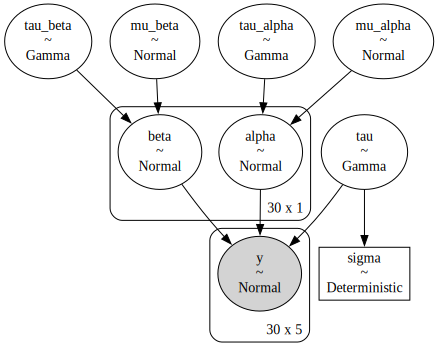

In [5]:
pm.model_to_graphviz(model=m)

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -p pytensor

Last updated: Sat Mar 18 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

pytensor: 2.10.1

arviz: 0.14.0
pymc : 5.1.1
numpy: 1.24.2

